# Comparison of Activation Functions for Deep Learning


---

For this purpose, a simple convolutional model was used for the MNIST dataset.
 


*   Sigmoid Function
*   Hyperbolic Tanjant Function
*   ReLU Function
*   Leaky-ReLU Function
*   Swish Function

The loss, validation, training accuracy for the different activation function and the same dataset and deep learning model are calculated. Comparison with histograms is presented.

---


### Please check the blog post for details!

### [You can follow the video! (in Turkish)](https://www.youtube.com/watch?v=ZMkLC-ebIqE)


---






資料來源：

https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a

### Google Colab Authentication Process

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### You can run this section to see the details of the hardware used!
We will do this work on the GPU (Tesla K80).

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4433349350366824477, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14126347632360826827
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17509060478205601935
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281491559
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5416476781368457401
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

### The step of libraries and imports.

In [ ]:
!pip install -q keras

In [19]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

## Downloading the Dataset

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Visualization of some sample data
We don't have to do this step. We're thinking about how to resize some of the data.


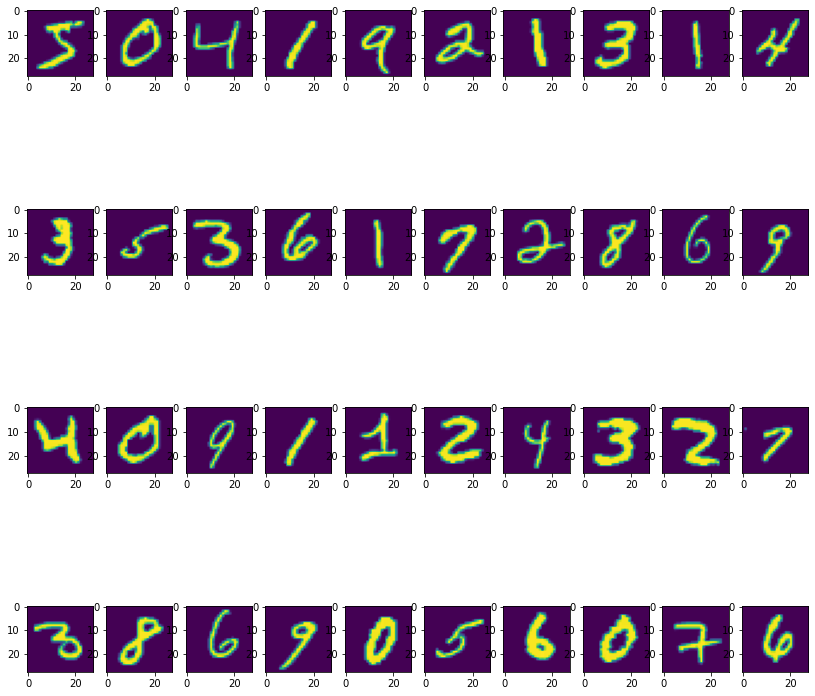

In [21]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

### Configuration Settings

In [23]:
batch_size = 128 # Batch-Size
num_classes = 10 # Number of Class
epochs = 10 # Number of epoch
w_l2 = 1e-5 # Initial

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [25]:
from keras import utils as np_utils
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors into binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Sigmoid Fonksiyonu 

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

### Result of Train and Test 


In [26]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1653 - accuracy: 0.9510 - val_loss: 0.1106 - val_accuracy: 0.9719
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1244 - accuracy: 0.9649 - val_loss: 0.0997 - val_accuracy: 0.9744
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1121 - accuracy: 0.9691 - val_loss: 0.0940 - val_accuracy: 0.9752
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1042 - accuracy: 0.9714 - val_loss: 0.0899 - val_accuracy: 0.9768
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0990 - accuracy: 0.9733 - val_loss: 0.0869 - val_accuracy: 0.9779
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0938 - accuracy: 0.9750 - val_loss: 0.0847 - val_accuracy: 0.9782
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0920 - accuracy: 0.9750 - val_loss: 0.0829 - val_accuracy: 0.9786

### Hyperbolic Tanjant Function

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)       

### Result of Train and Test

In [28]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1901 - accuracy: 0.9447 - val_loss: 0.1212 - val_accuracy: 0.9614
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0832 - accuracy: 0.9769 - val_loss: 0.0650 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0690 - accuracy: 0.9815 - val_loss: 0.0523 - val_accuracy: 0.9848
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0630 - accuracy: 0.9834 - val_loss: 0.0968 - val_accuracy: 0.9705
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0557 - accuracy: 0.9857 - val_loss: 0.0768 - val_accuracy: 0.9784
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0545 - accuracy: 0.9864 - val_loss: 0.0557 - val_accuracy: 0.9860
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0546 - accuracy: 0.9869 - val_loss: 0.0558 - val_accuracy: 0.985

### ReLU Function

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

### Result of Train and Test


In [30]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1829 - accuracy: 0.9503 - val_loss: 0.4568 - val_accuracy: 0.8520
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0779 - accuracy: 0.9790 - val_loss: 0.0530 - val_accuracy: 0.9841
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0649 - accuracy: 0.9832 - val_loss: 0.0473 - val_accuracy: 0.9872
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0573 - accuracy: 0.9855 - val_loss: 0.0429 - val_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0526 - accuracy: 0.9872 - val_loss: 0.0433 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0490 - accuracy: 0.9890 - val_loss: 0.0484 - val_accuracy: 0.9892
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0474 - accuracy: 0.9895 - val_loss: 0.0509 - val_accuracy: 0.987

### Leaky-ReLU Function
This function is defined as [advanced activation function](https://keras.io/layers/advanced-activations/) in keras, so we need to import this function and use it within the model.

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=keras.regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dense_12 (Dense)             (None, 24, 24, 64)        4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 64)       

### Result of Train and Test


In [32]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.1700 - accuracy: 0.9500 - val_loss: 0.1789 - val_accuracy: 0.9451
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0815 - accuracy: 0.9769 - val_loss: 0.0478 - val_accuracy: 0.9862
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0658 - accuracy: 0.9817 - val_loss: 0.0476 - val_accuracy: 0.9864
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0571 - accuracy: 0.9850 - val_loss: 0.0421 - val_accuracy: 0.9898
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0538 - accuracy: 0.9859 - val_loss: 0.0756 - val_accuracy: 0.9804
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0513 - accuracy: 0.9872 - val_loss: 0.0604 - val_accuracy: 0.9851
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0497 - accuracy: 0.9881 - val_loss: 0.0517 - val_accuracy:

### Definition of Swish Activation Function

In [33]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=keras.regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=keras.regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=keras.regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)      

### Result of Train and Test
Definition of the Histogram

In [35]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 12s 22ms/step - loss: 0.1652 - accuracy: 0.9559 - val_loss: 0.0526 - val_accuracy: 0.9853
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0703 - accuracy: 0.9819 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0563 - accuracy: 0.9857 - val_loss: 0.0442 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0496 - accuracy: 0.9882 - val_loss: 0.0409 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0448 - accuracy: 0.9900 - val_loss: 0.0483 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0408 - accuracy: 0.9920 - val_loss: 0.0422 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0402 - accuracy: 0.9918 - val_loss: 0.0412 - val_accuracy:

## Defining the plot function

In [79]:
def plot_history(hists, attribute='val_loss', axis=(-1,11,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acy': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_accuracy': 'valid. accuracy', 'accuracy': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish'], loc=loc)  

    plt.show()

In [80]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]

## COMPARISON OF RESULTS

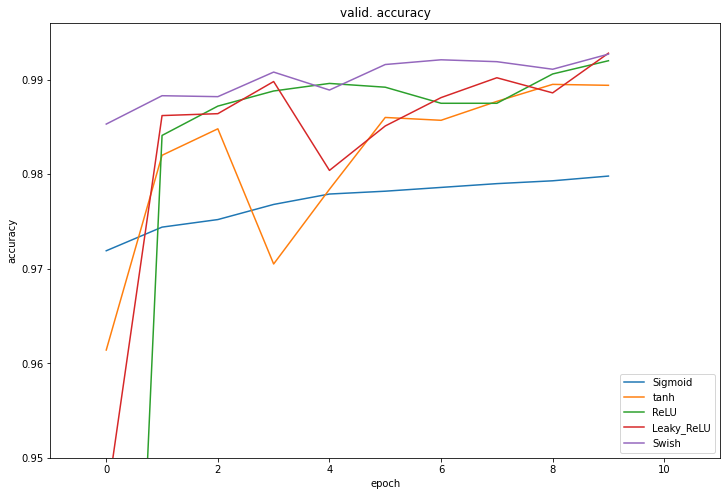

In [81]:
plot_history(hists, attribute='val_accuracy',axis=(-1,11,0.95,0.9960), loc='lower right')

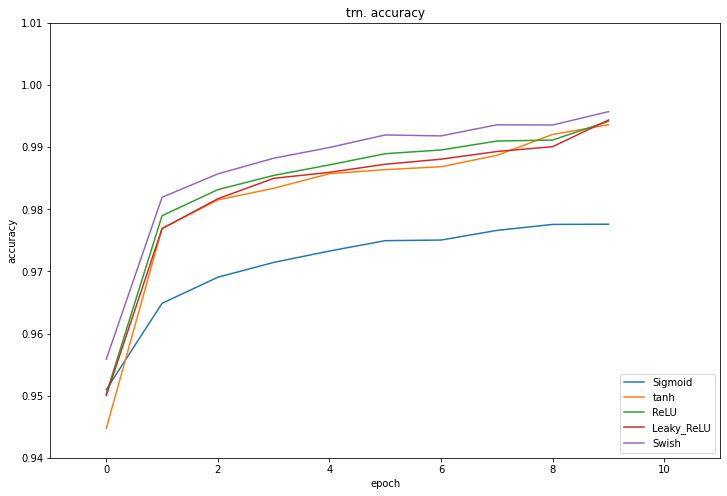

In [82]:
plot_history(hists, attribute='accuracy', axis=(-1,11,0.94,1.01), loc='lower right')

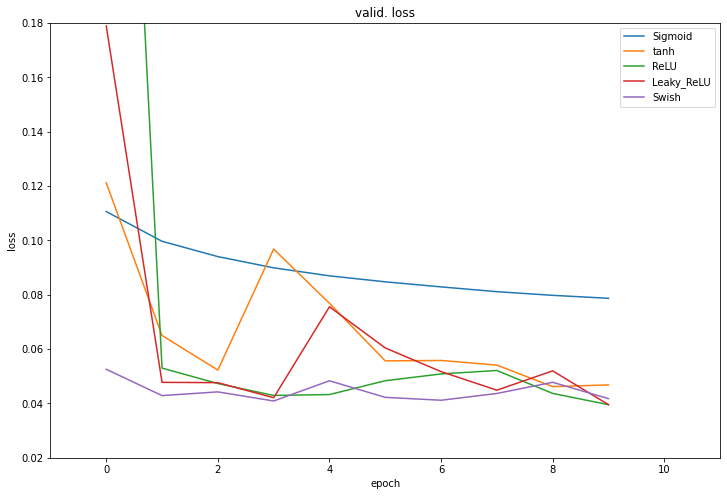

In [83]:
plot_history(hists, attribute='val_loss', axis=(-1,11,0.02,0.18), loc='upper right')

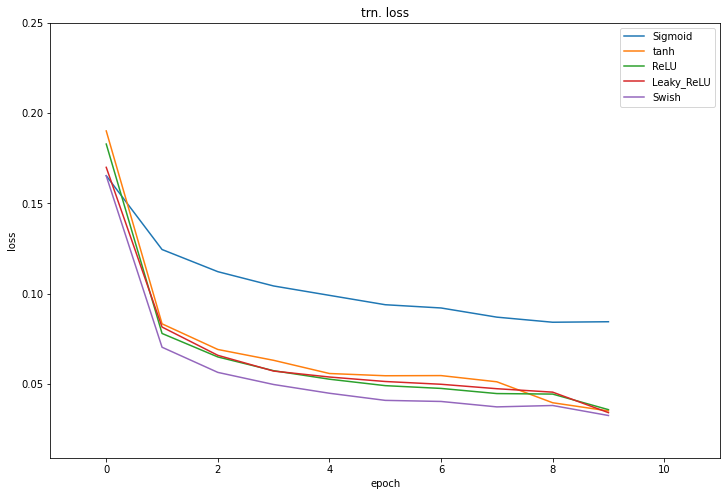

In [84]:
plot_history(hists, attribute='loss', axis=(-1,11,0.009,0.25), loc='upper right')